In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

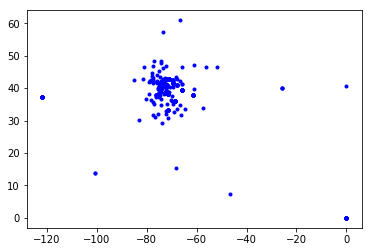

In [2]:
file_path = 'yellow_tripdata_2016-01.csv'
df = pd.read_csv(file_path)
df1 = df[['pickup_longitude']]
df2 = df[['pickup_latitude']]
plt.plot(df1, df2, 'b.')
plt.show()

In [4]:
file_path_AUG = 'yellow_tripdata_2016-08.csv'
df_AUG = pd.read_csv(file_path_AUG)

In [8]:
list(df_AUG)

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

In [27]:
new_col = ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'extra1',
 'extra2']
df_AUG = df_AUG.reset_index()

In [28]:
df_AUG.columns

Index(['level_0', 'level_1', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [30]:
df_AUG.columns = new_col

In [31]:
df_AUG.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'extra1', 'extra2'],
      dtype='object')

In [35]:
del df_AUG['extra1']
del df_AUG['extra2']
df_AUG

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-08-01 00:00:02,2016-08-01 00:15:04,1,3.70,1,N,239,234,1,13.5,0.5,0.5,2.20,0.00,0.3,17.00
1,1,2016-08-01 00:00:03,2016-08-01 00:03:45,2,0.70,1,N,141,162,1,4.5,0.5,0.5,1.15,0.00,0.3,6.95
2,1,2016-08-01 00:00:04,2016-08-01 00:06:12,1,1.20,1,N,230,163,1,6.5,0.5,0.5,1.55,0.00,0.3,9.35
3,2,2016-08-01 00:00:00,2016-08-01 00:10:45,5,2.07,1,N,65,49,1,9.5,0.5,0.5,2.70,0.00,0.3,13.50
4,2,2016-08-01 00:00:00,2016-08-01 16:58:59,1,23.43,2,N,239,132,2,52.0,0.3,0.5,0.00,5.54,0.3,58.64
5,2,2016-08-01 00:00:02,2016-08-01 00:16:22,1,9.53,1,N,100,243,1,26.5,0.5,0.5,4.00,0.00,0.3,31.80
6,2,2016-08-01 00:00:02,2016-08-01 00:11:17,1,4.98,1,N,50,116,1,15.5,0.5,0.5,3.36,0.00,0.3,20.16
7,2,2016-08-01 00:00:05,2016-08-01 00:10:46,1,2.81,1,N,237,224,1,11.0,0.5,0.5,2.00,0.00,0.3,14.30
8,2,2016-08-01 00:00:06,2016-08-01 00:04:08,1,1.17,1,N,236,75,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
9,2,2016-08-01 00:00:06,2016-08-01 00:33:31,1,18.92,2,N,132,114,1,52.0,0.0,0.5,10.56,0.00,0.3,63.36


In [40]:
AUG_PUcount = pd.value_counts(df_AUG['PULocationID'], sort = True)
AUG_PUcount

161    386388
186    369236
162    347765
170    342365
234    339402
237    333549
230    327979
48     319463
79     308527
236    281949
164    265664
163    264641
132    261523
138    254301
68     251666
142    245830
107    242245
239    220398
100    219609
141    219389
249    214166
90     198055
231    187688
229    185748
140    166385
113    165413
263    164487
148    158625
246    156168
238    154751
        ...  
15         26
73         25
240        25
105        22
183        22
23         18
111        17
86         17
122        16
184        11
251         8
201         8
46          7
109         6
27          6
156         6
172         5
2           5
214         5
59          5
118         4
30          4
58          3
187         3
99          2
5           2
204         2
176         2
44          1
84          1
Name: PULocationID, dtype: int64

In [48]:
AUG_PUcount_unsort = df_AUG['PULocationID'].value_counts()

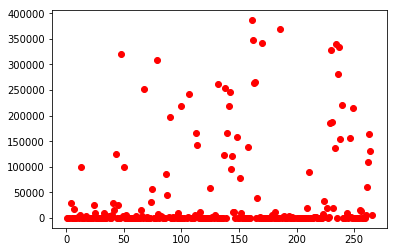

In [49]:
plt.plot(AUG_PUcount_unsort, 'ro')
plt.show()

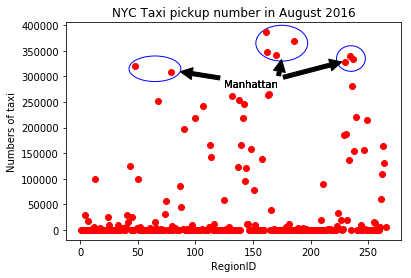

In [118]:
from matplotlib.patches import Ellipse

plt.plot(AUG_PUcount_unsort, 'ro')

plt.annotate('Manhattan', xy=(175, 335000), xytext=(125, 280000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('Manhattan', xy=(85, 310000), xytext=(125, 280000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('Manhattan', xy=(230, 330000), xytext=(125, 280000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax = plt.gca()
ellipse = [Ellipse(xy=(65, 315000), width=45, height=50000, fill=False, edgecolor='b'),
           Ellipse(xy=(175, 365000), width=45, height=70000, fill=False, edgecolor='b'),
           Ellipse(xy=(235, 335000), width=25, height=50000, fill=False, edgecolor='b')]
for e in ellipse:
    ax.add_patch(e)

plt.xlabel('RegionID')
plt.ylabel('Numbers of taxi')
plt.title('NYC Taxi pickup number in August 2016')
plt.show()

In [121]:
AUG_DOcount = pd.value_counts(df_AUG['DOLocationID'], sort=True)
AUG_DOcount

161    387702
170    338603
230    325090
162    322163
237    294053
186    291651
234    289236
236    287215
48     278305
79     254939
163    247703
164    233634
68     230644
142    221796
141    218687
107    208474
239    207273
246    188973
231    179150
140    172931
100    167952
263    167557
249    165736
229    164836
238    163484
90     151317
233    147914
113    138606
137    138062
158    121640
        ...  
23        243
58        236
96        227
8         212
206       190
245       183
118       177
214       173
251       163
46        161
111       148
154       119
253       116
172       106
27        105
156        90
109        89
184        88
84         81
59         79
176        75
187        64
5          55
204        42
44         37
30         28
105        11
2           4
99          3
110         1
Name: DOLocationID, dtype: int64

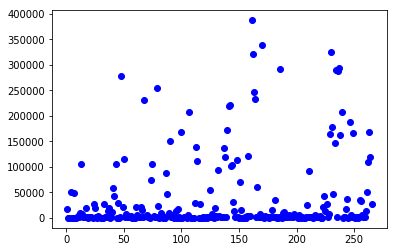

In [123]:
AUG_DOcount_unsort = df_AUG['DOLocationID'].value_counts()
plt.plot(AUG_DOcount_unsort, 'bo')
plt.show()

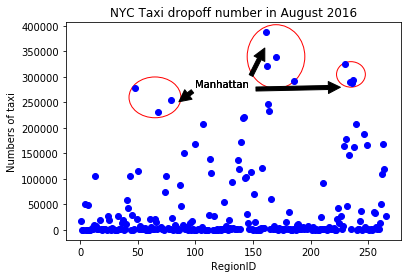

In [156]:
plt.plot(AUG_DOcount_unsort, 'bo')

plt.annotate('Manhattan', xy=(161, 360000), xytext=(100, 280000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('Manhattan', xy=(85, 250000), xytext=(100, 280000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('Manhattan', xy=(230, 280000), xytext=(100, 280000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax = plt.gca()
ellipse = [Ellipse(xy=(65, 260000), width=45, height=80000, fill=False, edgecolor='r'),
           Ellipse(xy=(170, 340000), width=50, height=125000, fill=False, edgecolor='r'),
           Ellipse(xy=(235, 305000), width=25, height=50000, fill=False, edgecolor='r')]
for e in ellipse:
    ax.add_patch(e)

plt.xlabel('RegionID')
plt.ylabel('Numbers of taxi')
plt.title('NYC Taxi dropoff number in August 2016')
plt.show()

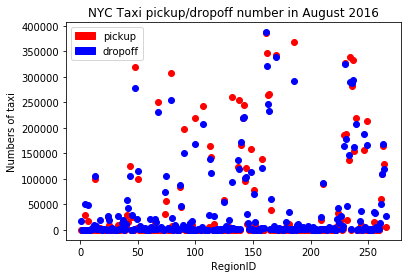

In [167]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='pickup')
blue_patch = mpatches.Patch(color='blue', label='dropoff')
plt.legend(handles=[red_patch, blue_patch])

plt.plot(AUG_PUcount_unsort, 'ro')
plt.plot(AUG_DOcount_unsort, 'bo')
plt.xlabel('RegionID')
plt.ylabel('Numbers of taxi')
plt.title('NYC Taxi pickup/dropoff number in August 2016')
plt.show()

In [163]:
df_AUG['tpep_pickup_datetime'] = pd.to_datetime(df_AUG['tpep_pickup_datetime'])
df_AUG['hour']  = df_AUG['tpep_pickup_datetime'].apply(lambda x: x.hour)
df_AUG['hour'].value_counts()

18    629963
19    621356
20    568738
21    554244
17    538746
22    527841
15    513577
14    512740
12    484830
13    483598
16    465822
11    461285
9     447070
10    443958
8     438189
23    435347
7     377731
0     360555
1     272368
6     222803
2     207505
3     153648
4     115593
5     104756
Name: hour, dtype: int64

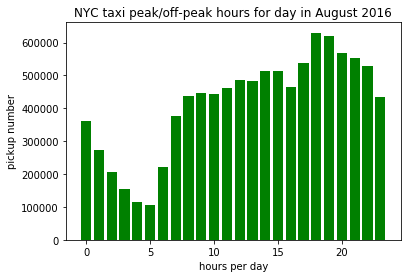

In [172]:
y = df_AUG['hour'].value_counts(sort=False)
N = len(y)
x = range(N)
plt.bar(x, y, color='g')
plt.xlabel('hours per day')
plt.ylabel('pickup number')
plt.title('NYC taxi peak/off-peak hours for day in August 2016')
plt.show()

In [183]:
df_AUG['trip_distance'].mean()

3.9484142775140905

In [8]:
df_zone = pd.read_csv('taxi+_zone_lookup.csv')
df_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [12]:
zone = df_zone.groupby('Borough')
zone.count()

,LocationID,Zone,service_zone
Borough,,,
Bronx,43,43,43
Brooklyn,61,61,61
EWR,1,1,1
Manhattan,69,69,69
Queens,69,69,69
Staten Island,20,20,20
Unknown,2,1,0


In [79]:
zone['LocationID'].count()

Borough
Bronx            43
Brooklyn         61
EWR               1
Manhattan        69
Queens           69
Staten Island    20
Unknown           2
Name: LocationID, dtype: int64

In [44]:
df_AUG = pd.read_csv(file_path_AUG)
new_col = ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'extra1',
 'extra2']
df_AUG = df_AUG.reset_index()
df_AUG.columns = new_col
del df_AUG['extra1']
del df_AUG['extra2']
df_AUG

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-08-01 00:00:02,2016-08-01 00:15:04,1,3.70,1,N,239,234,1,13.5,0.5,0.5,2.20,0.00,0.3,17.00
1,1,2016-08-01 00:00:03,2016-08-01 00:03:45,2,0.70,1,N,141,162,1,4.5,0.5,0.5,1.15,0.00,0.3,6.95
2,1,2016-08-01 00:00:04,2016-08-01 00:06:12,1,1.20,1,N,230,163,1,6.5,0.5,0.5,1.55,0.00,0.3,9.35
3,2,2016-08-01 00:00:00,2016-08-01 00:10:45,5,2.07,1,N,65,49,1,9.5,0.5,0.5,2.70,0.00,0.3,13.50
4,2,2016-08-01 00:00:00,2016-08-01 16:58:59,1,23.43,2,N,239,132,2,52.0,0.3,0.5,0.00,5.54,0.3,58.64
5,2,2016-08-01 00:00:02,2016-08-01 00:16:22,1,9.53,1,N,100,243,1,26.5,0.5,0.5,4.00,0.00,0.3,31.80
6,2,2016-08-01 00:00:02,2016-08-01 00:11:17,1,4.98,1,N,50,116,1,15.5,0.5,0.5,3.36,0.00,0.3,20.16
7,2,2016-08-01 00:00:05,2016-08-01 00:10:46,1,2.81,1,N,237,224,1,11.0,0.5,0.5,2.00,0.00,0.3,14.30
8,2,2016-08-01 00:00:06,2016-08-01 00:04:08,1,1.17,1,N,236,75,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
9,2,2016-08-01 00:00:06,2016-08-01 00:33:31,1,18.92,2,N,132,114,1,52.0,0.0,0.5,10.56,0.00,0.3,63.36


In [61]:
df_AUG['PULocationID'].head(100)

0     239
1     141
2     230
3      65
4     239
5     100
6      50
7     237
8     236
9     132
10     68
11     65
12    233
13    114
14    229
15    263
16     48
17    236
18    161
19    163
20    114
21      7
22    230
23     50
24     68
25     79
26    186
27    263
28    231
29    148
     ... 
70    100
71     68
72    132
73    164
74    234
75    249
76    239
77    132
78    249
79    186
80    138
81     75
82    114
83    163
84    230
85     90
86    141
87     79
88    143
89    137
90    249
91    236
92    158
93    163
94     79
95     88
96    113
97    132
98     50
99    224
Name: PULocationID, dtype: int64

In [65]:
a = []
for data in df_AUG['PULocationID']:
    a.append(df_zone['Borough'][data-1])

In [70]:
from collections import Counter
Counter(a)

Counter({'Bronx': 8180,
         'Brooklyn': 156022,
         'EWR': 747,
         'Manhattan': 9010878,
         'Queens': 629670,
         'Staten Island': 633,
         'Unknown': 136133})

In [77]:
b = []
for data in df_AUG['DOLocationID']:
    b.append(df_zone['Borough'][data-1])
Counter(b)

Counter({'Bronx': 65624,
         'Brooklyn': 508142,
         'EWR': 18173,
         'Manhattan': 8662716,
         'Queens': 538287,
         'Staten Island': 2758,
         'Unknown': 146563})

In [85]:
mean = df_AUG['trip_distance'].mean()
long = 0
short = 0
for data in df_AUG['trip_distance']:
    if data > mean:
        long = long+1
    else:
        short = short+1

In [87]:
print('short = ',short)
print('long = ',long)

short =  7998710
long =  1943553


In [92]:
short/len(df_AUG)

0.8045160342268154

In [93]:
long/len(df_AUG)

0.19548396577318464

In [100]:
pay_long = [0,0,0,0,0,0]
pay_short = [0,0,0,0,0,0]
fare_long = 0
fare_short = 0
tip_long = 0
tip_short = 0
pay_index = 0
for index in range(0, len(df_AUG)):
    pay_index = df_AUG['payment_type'][index]-1
    if df_AUG['trip_distance'][index] > mean:
        fare_long = fare_long + df_AUG['fare_amount'][index]
        tip_long = tip_long + df_AUG['tip_amount'][index]
        pay_long[pay_index] = pay_long[pay_index] +1
    else:
        fare_short = fare_short + df_AUG['fare_amount'][index]
        tip_short = tip_short + df_AUG['tip_amount'][index]
        pay_short[pay_index] = pay_short[pay_index] +1


In [101]:
print(pay_long)

[1324028, 607242, 9106, 3177, 0, 0]


In [102]:
print(pay_short)

[5058373, 2895355, 33972, 11009, 1, 0]


In [103]:
for d in pay_long:
    print(d/long)

0.6812410055192732
0.312439125663154
0.0046852336931382885
0.0016346351244344763
0.0
0.0


In [104]:
for d in pay_short:
    print(d/short)

0.632398599274133
0.3619777439112057
0.004247184858558442
0.001376346935943421
1.250201595007195e-07
0.0


In [105]:
print(fare_long/long)

29.8914180884


In [106]:
print(fare_short/short)

9.21311821656


In [107]:
print(tip_long/long)

3.90206366382


In [108]:
print(tip_short/short)

1.22443003309
